# D212 Data Mining II Performance Assessment, Task \# 1

Submitted by William J Townsend, Student ID 003397146, for WGU's MSDA program

## Table of Contents
<ul>
<li><a href="#PartA1">A1: Research Question</a></li>
<li><a href="#PartA2">A2: Objectives and Goals of Analysis</a></li>
<li><a href="#PartB1">B1: Explanation of Clustering Technique</a></li>
<li><a href="#PartB2">B2: Assumptions of Clustering Technique</a></li>
<li><a href="#PartB3">B3: Benefits of Chosen Tools</a></li> 
<li><a href="#PartC1">C1: Data Preparation Goals and Necessary Manipulation</a></li>
<li><a href="#PartC2">C2: Variable Selection & Identification</a></li>
<li><a href="#PartC3">C3: Preparation of Data</a></li>
<li><a href="#PartC4">C4: Copy of Prepared Data Set</a></li>
<li><a href="#PartD1">D1: Analysis Description</a></li>
<li><a href="#PartD2">D2: Classification Analysis Code</a></li>
<li><a href="#PartE1">E1: Accuracy of Clustering Model</a></li> 
<li><a href="#PartE2">E2: Model Results</a></li> 
<li><a href="#PartE3">E3: Model Limitations</a></li>
<li><a href="#PartE4">E4: Recommended Action</a></li>
<li><a href="#PartF">F: Panopto Recording</a></li>
<li><a href="#PartG">G: Code References</a></li>
<li><a href="#PartH">H: Source References</a></li>    
</ul>

<a id='PartA1'></a>
## A1: Research Question

Cursory examination of the answers to the 8 medical survey questions indicates that each question has a very similar distribution, with similar means, ranges, and standard deviations. As a result, it's difficult to take anything in particular from this data, as each of the 8 variables seem fairly identical in terms of their importance to the patients of the WGU Hospital System. However, the overall distribution of the survey results being largely identical does not mean that there may not be patterns deeper within the data to be found. For example, half of patients might think that Questions 1 - 4 are more important and Questions 5 - 8 less so, while the other half of patients may feel the opposite. This would result in the same overall distribution, though that is a significant distinction that could be useful to know about. 

As a result, I intend to use hierarchical clustering to try to determine if there are meaningful groups or clusters in the survey data that can be found. 

<a id="#PartA2"></a>
## A2: Objectives and Goals of Analysis

As explained above, the use of hierarchical clustering is intended to determine if there are meaningful groups or clusters in the survey data that are hidden by the overall distribution of scores. The identification of such groups could help identify primary survey variables of interest to one group or another. This can be useful to the hospital system because it could allow us to simplify our surveys or eliminate redundant data, but more importantly, identifying such patterns could reveal the most important variables to particular groups of patients, allowing us to concentrate our efforts to more effectively increase patient satisfaction with the hospital system. 

<a id="#PartB1"></a>
## B1: Explanation of Clustering Technique

Hierarchical clustering takes various observations and generates clusters that have hierarchical relationships, where one cluster is a part of another is a part of another, until all data is related to each other through these clusters. Clusters are formed by groups of observations that are closely related, which are grouped together in an intermediate cluster. Additional intermediate clusters are then created by grouping smaller intermediate clusters that are also closely related, though not as closely as the constituent observations within each of the smaller clusters. This process continues until all of the data is accounted for within a single overall cluster that encompasses all of the data. A good example of this is the manner in which animals are scientifically classified, from one cluster of animals into two smaller and more closely related clusters of vertebrates and invertebrates, then each of those clusters are broken down into smaller and more closely related clusters such as reptiles, mammals, etc. 

I will use SciPy's `linkage` function to perform the hierarchical clustering of the survey responses of each of the 10,000 patients and their survey data. This will generate a complex matrix of data, which is not very intuitively useful to human readers. This linkage, however, can be used to generate a graph of these hierarchical clusters, called a dendrogram. Using SciPy's `dendrogram` function, I can generate a dendogram that will provide a visualization of the clustering that was performed, showing the formation of the clusters and their distance from each other. This will allow me to determine the most appropriate number of clusters that the dataset should be divided into. Finally, Sci's `fcluster` function will allow me to add a label to each observation in the dataset, labelling it by which cluster it belongs to. With each patient being placed into a cluster, I can then look at the distributions of survey responses by cluster, to determine if any patterns can be seen which were not previously evident. 

<a id="#PartB2"></a>
## B2: Assumptions of Clustering Technique

Hierarchical clustering uses measurements of distance between observations in order to determine what observations (or intermediate clusters) are "closest" for the purposes of joining them into a new cluster. This comes with an assumption of a standard scale for the variables being used for the clustering, as having different ranges for each variable can lead to the variables with the largest range dominating the variables with smaller ranges. Ordinarily, this could be done through a tool such as `StandardScaler`, but this is actually not necessary in this case. Because all of the data is from a survey across a range of 1 - 8, the data is already standardized in its scale. 

<a id="#PartB3"></a>
## B3: Benefits of Chosen Tools

I will be using Python throughout this analysis project. Python is a programming language that supports data science processes very well, particularly in the use of packages designed specifically for this. Python also happens to be the only programming language that I know to any sort of significant degree. I'll also be using several Python packages to perform this analysis:
- pandas allows for the handling of the dataset in something like a large table or spreadsheet
- NumPy allows for performing certain mathematical operations or assignment of certain values within the dataset
- Seaborn and MatPlotLib provide graphing functionality
- SciPy's linkage and fcluster functionality is going to perform the hierarchical clustering of datapoints
- SciPy's dendogram function will allow us to graph the hierarchical clusters generated by the linkage function
- SciKitLearn's silhouette score allows us to evaluate our clustering metric

In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score

# The CSV's first column is an index and Pandas will duplicate this and create an column without 'index_col=0'
df = pd.read_csv('./medical_clean.csv', index_col=0)
# Check data types and number of values, as well as overall size of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_id         10000 non-null  object 
 1   Interaction         10000 non-null  object 
 2   UID                 10000 non-null  object 
 3   City                10000 non-null  object 
 4   State               10000 non-null  object 
 5   County              10000 non-null  object 
 6   Zip                 10000 non-null  int64  
 7   Lat                 10000 non-null  float64
 8   Lng                 10000 non-null  float64
 9   Population          10000 non-null  int64  
 10  Area                10000 non-null  object 
 11  TimeZone            10000 non-null  object 
 12  Job                 10000 non-null  object 
 13  Children            10000 non-null  int64  
 14  Age                 10000 non-null  int64  
 15  Income              10000 non-null  float64
 16  Mari

In [2]:
# Visually inspect dataframe to facilitate exploration, spot problems
pd.set_option("display.max_columns", None)
df.head(5)

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


<a id="#PartC1"></a>
## C1: Data Preparation Goals and Necessary Manipulation

The primary issue that will have to be addressed with this dataset, given the intended analysis, is the preparation of the survey results. The data dictionary associated with the dataset indicates that a survey score of 1 is the highest importance that can be placed on a survey item, and a survey score of 8 is the lowest score. This is an unintuitive way to store this data that can complicate any attempt to compare datapoints, because we intuitively understand that 8 > 1, rather than the reverse. As a result, this data needs to be remapped in the reverse, so that a score of 1 (most important) becomes a score of 8. In doing so, these variables must also be recast as floats, rather than ints, to facilitate the linkage matrix, as it will not work on an int64 datatype. The columns will also be renamed to be more descriptive. 

<a id="#PartC2"></a>
## C2: Variable Selection & Identification

This data analysis project focuses only on the survey responses provided by patients. Because of this, we can omit all other variables besides the survey questions. This avoids clustering on other considerations, such as patients having similar health conditions, ensuring that we are clustering only based on their survey responses and how they prioritize one service consideration over another. This results in our usage of the following variables for this analysis:

- Item1 (qualitative) *(will be renamed to: surv1_timely_admit)* <br>

This column documents the patient's response to a survey question regarding the importance of timely admission. The survey uses 1 to indicate that this is "most important" and an 8 to indicate that this is "least important". This will be reversed in the final dataset. 

- Item2 (qualitative) *(will be renamed to: surv2_timely_treat)* <br>

This column documents the patient's response to a survey question regarding the importance of timely treatment. The survey uses 1 to indicate that this is "most important" and an 8 to indicate that this is "least important".This will be reversed in the final dataset. 

- Item3 (qualitative) *(will be renamed to: surv3_timely_visit)* <br>

This column documents the patient's response to a survey question regarding the importance of timely visits. The survey uses 1 to indicate that this is "most important" and an 8 to indicate that this is "least important". This will be reversed in the final dataset. 

- Item4 (qualitative) *(will be renamed to: surv4_reliable)* <br>

This column documents the patient's response to a survey question regarding the importance of reliability. The survey uses 1 to indicate that this is "most important" and an 8 to indicate that this is "least important". This will be reversed in the final dataset. 

- Item5 (qualitative) *(will be renamed to: surv5_options)* <br>

This column documents the patient's response to a survey question regarding the importance of options. The survey uses 1 to indicate that this is "most important" and an 8 to indicate that this is "least important". This will be reversed in the final dataset. 

- Item6 (qualitative) *(will be renamed to: surv6_hours)* <br>

This column documents the patient's response to a survey question regarding the importance of hours of treatment. The survey uses 1 to indicate that this is "most important" and an 8 to indicate that this is "least important". This will be reversed in the final dataset. 

- Item7 (qualitative) *(will be renamed to: surv7_courteous)* <br>

This column documents the patient's response to a survey question regarding the importance of courteous staff. The survey uses 1 to indicate that this is "most important" and an 8 to indicate that this is "least important". This will be reversed in the final dataset. 

- Item8 (qualitative) *(will be renamed to: surv8_dr_listen)* <br>

This column documents the patient's response to a survey question regarding the importance of evidence of active listening from doctor. The survey uses 1 to indicate that this is "most important" and an 8 to indicate that this is "least important". This will be reversed in the final dataset. 

Despite being numeric in their content, each of these variables are actually qualitative. This is because the number in the variable doesn't *actually* represent the number itself, but instead represents a relative standard of importance. A "2" may not necessarily be twice as important as a 1, or half as important as a 4, but instead just reflects a relative importance. This results in 8 categories being created, each represented by a number (1 - 8), with nothing able to exist outside of that range nor able to exist between categories (such as a value of 2.5). 

<a id="#PartC3"></a>
## C3: Preparation of Data

The data will be cleaned using much of the same code that I've been using for this dataset since D206, when I first began working with this dataset, as noted in my code references at the end of this report. Some changes have been made to recast the survey responses as a float rather than an ordered categorical datatype. 

In [3]:
# Convert column to string from int, then front-fill string with 0's to reach 5 chars
df['Zip'] = df['Zip'].astype("str").str.zfill(5)
# Convert column to category from string
df["Area"] = df["Area"].astype("category")
# Replace city-specific values with time-zone specific values
df.TimeZone.replace({
    # Puerto Rico does not observe DST, stays on Atlantic Standard Time all year long
    "America/Puerto_Rico" : "US - Puerto Rico",
    # US - Eastern observes DST
    "America/New_York": "US - Eastern",
    "America/Detroit" : "US - Eastern",
    "America/Indiana/Indianapolis" : "US - Eastern",
    "America/Indiana/Vevay" : "US - Eastern",
    "America/Indiana/Vincennes" : "US - Eastern",
    "America/Kentucky/Louisville" : "US - Eastern",
    "America/Toronto" : "US - Eastern",
    "America/Indiana/Marengo" : "US - Eastern",
    "America/Indiana/Winamac" : "US - Eastern",
    # US - Central observes DST
    "America/Chicago" : "US - Central", 
    "America/Menominee" : "US - Central",
    "America/Indiana/Knox" : "US - Central",
    "America/Indiana/Tell_City" : "US - Central",
    "America/North_Dakota/Beulah" : "US - Central",
    "America/North_Dakota/New_Salem" : "US - Central",
    # US - Mountain observes DST
    "America/Denver" : "US - Mountain",
    "America/Boise" : "US - Mountain",
    # Arizona does not observe DST, stays on Mountain Standard Time all year long
    "America/Phoenix" : "US - Arizona",
    # US - Pacific observes DST
    "America/Los_Angeles" : "US - Pacific",
    # US - Alaskan observes DST
    "America/Nome" : "US - Alaskan",
    "America/Anchorage" : "US - Alaskan",
    "America/Sitka" : "US - Alaskan",
    "America/Yakutat" : "US - Alaskan",
    # US - Aleutian observes DST
    "America/Adak" : "US - Aleutian",
    # US - Hawaiian does not observe DST, stays on Hawaii Standard Time all year
    "Pacific/Honolulu" : "US - Hawaiian" 
    }, inplace=True)
# Convert column to category from string
df["TimeZone"] = df["TimeZone"].astype("category")
# Reformat column representing currency in USD to 3 decimal places from 6
df["Income"] = df["Income"].astype(int)
# Convert column to category from string
df["Marital"] = df["Marital"].astype("category")
# Convert column to category from string
df["Gender"] = df["Gender"].astype("category")
# Recast object > boolean wants to turn everything True, need to map Yes/No to True/False
bool_mapping = {"Yes" : 1, "No" : 0}
# Convert column to boolean from string
df["ReAdmis"] = df["ReAdmis"].map(bool_mapping)
# Convert column to boolean from string
df["Soft_drink"] = df["Soft_drink"].map(bool_mapping)
# Convert column to category from string
df["Initial_admin"] = df["Initial_admin"].astype("category")
# Convert column to boolean from string
df["HighBlood"] = df["HighBlood"].map(bool_mapping)
# Convert column to boolean from string
df["Stroke"] = df["Stroke"].map(bool_mapping)
# Convert column to category from string
df["Complication_risk"] = df["Complication_risk"].astype("category")
# Convert column to boolean from string
df["Overweight"] = df["Overweight"].map(bool_mapping)
# Convert column to boolean from string
df["Arthritis"] = df["Arthritis"].map(bool_mapping)
# Convert column to boolean from string
df["Diabetes"] = df["Diabetes"].map(bool_mapping)
# Convert column to boolean from string
df["Hyperlipidemia"] = df["Hyperlipidemia"].map(bool_mapping)
# Convert column to boolean from string
df["BackPain"] = df["BackPain"].map(bool_mapping)
# Convert column to boolean from string
df["Anxiety"] = df["Anxiety"].map(bool_mapping)
# Convert column to boolean from string
df["Allergic_rhinitis"] = df["Allergic_rhinitis"].map(bool_mapping)
# Convert column to boolean from string
df["Reflux_esophagitis"] = df["Reflux_esophagitis"].map(bool_mapping)
# Convert column to boolean from string
df["Asthma"] = df["Asthma"].map(bool_mapping)
# Convert column to category from string
df["Services"] = df["Services"].astype("category")
# Reformat column representing currency in USD to 3 decimal places from 6
df["TotalCharge"] = df.TotalCharge.round(3)
# Reformat column representing currency in USD to 3 decimal places from 6
df["Additional_charges"] = df.Additional_charges.round(3)
# Establish map for reversing survey questions to reflect a truth where 1 < 8 (currently the reverse)
survey_mapping = {1: 8, 2: 7, 3 : 6, 4: 5, 5: 4, 6: 3, 7 : 2, 8 : 1}
# Remap column to reflect 1 < 8, rather than 1 > 8
df["Item1"] = df["Item1"].map(survey_mapping)
# Remap from int to float, kmeans will fail without float or double datatype
df["Item1"] = df["Item1"].astype('float64')
# Remap column to reflect 1 < 8, rather than 1 > 8
df["Item2"] = df["Item2"].map(survey_mapping)
# Remap from int to float, kmeans will fail without float or double datatype
df["Item2"] = df["Item2"].astype('float64')
# Remap column to reflect 1 < 8, rather than 1 > 8
df["Item3"] = df["Item3"].map(survey_mapping)
# Remap from int to float, kmeans will fail without float or double datatype
df["Item3"] = df["Item3"].astype('float64')
# Remap column to reflect 1 < 8, rather than 1 > 8
df["Item4"] = df["Item4"].map(survey_mapping)
# Remap from int to float, kmeans will fail without float or double datatype
df["Item4"] = df["Item4"].astype('float64')
# Remap column to reflect 1 < 8, rather than 1 > 8
df["Item5"] = df["Item5"].map(survey_mapping)
# Remap from int to float, kmeans will fail without float or double datatype
df["Item5"] = df["Item5"].astype('float64')
# Remap column to reflect 1 < 8, rather than 1 > 8
df["Item6"] = df["Item6"].map(survey_mapping)
# Remap from int to float, kmeans will fail without float or double datatype
df["Item6"] = df["Item6"].astype('float64')
# Remap column to reflect 1 < 8, rather than 1 > 8
df["Item7"] = df["Item7"].map(survey_mapping)
# Remap from int to float, kmeans will fail without float or double datatype
df["Item7"] = df["Item7"].astype('float64')
# Remap column to reflect 1 < 8, rather than 1 > 8
df["Item8"] = df["Item8"].map(survey_mapping)
# Remap from int to float, kmeans will fail without float or double datatype
df["Item8"] = df["Item8"].astype('float64')
# Generate column names which are pythonic in syntax and descriptive
pythonic_columns = ["customer_id", "interaction", "uid", "city", "state", "county", 
                    "zip_code", "latitude", "longitude", "population", "area_type", "timezone", "job", "children", 
                    "age", "income", "marital_status", "gender", "readmission", 
                    "vitamin_d_level", "dr_visits", "full_meals", "vit_d_supp", "soft_drink", "initial_admit", 
                    "high_bp", "stroke", "complication_risk", "overweight", "arthritis", "diabetes", "hyperlipidemia", 
                    "back_pain", "anxiety", "allergic_rhinitis", "reflux_esophagitis", "asthma", "services", 
                    "days_hospitalized", "daily_charge", "addl_charge", "surv1_timely_admit", "surv2_timely_treat", 
                    "surv3_timely_visit", "surv4_reliable", "surv5_options", "surv6_hours", "surv7_courteous", 
                    "surv8_dr_listen"]
# Implement new pythonic column headings
df.set_axis(pythonic_columns, axis=1, inplace=True)
# Visually inspect DF for appropriate appearance and values
df.head()

,customer_id,interaction,uid,city,state,county,zip_code,latitude,longitude,population,area_type,timezone,job,children,age,income,marital_status,gender,readmission,vitamin_d_level,dr_visits,full_meals,vit_d_supp,soft_drink,initial_admit,high_bp,stroke,complication_risk,overweight,arthritis,diabetes,hyperlipidemia,back_pain,anxiety,allergic_rhinitis,reflux_esophagitis,asthma,services,days_hospitalized,daily_charge,addl_charge,surv1_timely_admit,surv2_timely_treat,surv3_timely_visit,surv4_reliable,surv5_options,surv6_hours,surv7_courteous,surv8_dr_listen
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,US - Central,"Psychologist, sport and exercise",1,53,86575,Divorced,Male,0,19.141466,6,0,0,0,Emergency Admission,1,0,Medium,0,1,1,0,1,1,1,0,1,Blood Work,10.585770,3726.703,17939.403,6.0,6.0,7.0,7.0,5.0,6.0,6.0,5.0
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,US - Central,Community development worker,3,51,46805,Married,Female,0,18.940352,4,2,1,0,Emergency Admission,1,0,High,1,0,0,0,0,0,0,1,0,Intravenous,15.129562,4193.190,17612.998,6.0,5.0,6.0,5.0,5.0,5.0,6.0,6.0
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,US - Central,Chief Executive Officer,3,53,14370,Widowed,Female,0,18.057507,4,1,0,0,Elective Admission,1,0,Medium,1,0,1,0,0,0,0,0,0,Blood Work,4.772177,2434.234,17505.192,7.0,5.0,5.0,5.0,6.0,5.0,6.0,6.0
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,US - Central,Early years teacher,0,78,39741,Married,Male,0,16.576858,4,1,0,0,Elective Admission,0,1,Medium,0,1,0,0,0,0,0,1,1,Blood Work,1.714879,2127.830,12993.437,6.0,4.0,4.0,6.0,5.0,4.0,4.0,4.0
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,US - Eastern,Health promotion specialist,1,22,1209,Widowed,Female,0,17.439069,5,0,2,1,Elective Admission,0,0,Low,0,0,0,1,0,0,1,0,0,CT Scan,1.254807,2113.073,3716.526,7.0,8.0,6.0,6.0,4.0,6.0,5.0,6.0


Before diving into the actual analysis, I will take the time to demonstrate the homogeneity of the survey data, just to support the contention that I made in the beginning of this report regarding how the mean and standard deviation of each question is very similar. You can see in this data that the means for each question range from 5.478 to 5.506, a difference of just 28 thousandths. The standard deviations range from 1.021 to 1.042. 

In [4]:
print(f"For question 1 of the survey, the mean overall score is {round(df.surv1_timely_admit.mean(), 3)}, with a standard deviation of {round(df.surv1_timely_admit.std(), 3)}.")
print(f"For question 2 of the survey, the mean overall score is {round(df.surv2_timely_treat.mean(), 3)}, with a standard deviation of {round(df.surv2_timely_treat.std(), 3)}.")
print(f"For question 3 of the survey, the mean overall score is {round(df.surv3_timely_visit.mean(), 3)}, with a standard deviation of {round(df.surv3_timely_visit.std(), 3)}.")
print(f"For question 4 of the survey, the mean overall score is {round(df.surv4_reliable.mean(), 3)}, with a standard deviation of {round(df.surv4_reliable.std(), 3)}.")
print(f"For question 5 of the survey, the mean overall score is {round(df.surv5_options.mean(), 3)}, with a standard deviation of {round(df.surv5_options.std(), 3)}.")
print(f"For question 6 of the survey, the mean overall score is {round(df.surv6_hours.mean(), 3)}, with a standard deviation of {round(df.surv6_hours.std(), 3)}.")
print(f"For question 7 of the survey, the mean overall score is {round(df.surv7_courteous.mean(), 3)}, with a standard deviation of {round(df.surv7_courteous.std(), 3)}.")
print(f"For question 8 of the survey, the mean overall score is {round(df.surv8_dr_listen.mean(), 3)}, with a standard deviation of {round(df.surv8_dr_listen.std(), 3)}.")

For question 1 of the survey, the mean overall score is 5.481, with a standard deviation of 1.032.
For question 2 of the survey, the mean overall score is 5.493, with a standard deviation of 1.035.
For question 3 of the survey, the mean overall score is 5.489, with a standard deviation of 1.033.
For question 4 of the survey, the mean overall score is 5.485, with a standard deviation of 1.036.
For question 5 of the survey, the mean overall score is 5.503, with a standard deviation of 1.03.
For question 6 of the survey, the mean overall score is 5.478, with a standard deviation of 1.032.
For question 7 of the survey, the mean overall score is 5.506, with a standard deviation of 1.021.
For question 8 of the survey, the mean overall score is 5.49, with a standard deviation of 1.042.


<a id="#PartC4"></a>
## C4: Copy of Prepared Data Set

A copy of the prepared full dataset is submitted alongside this analysis. 

In [5]:
# Save dataframe to CSV, ignore index (if included, this will create an additional unnecessary column)
df.to_csv('task1_full_clean.csv', index=False)

<a id="#PartD1"></a>
## D1: Analysis Description

As described above, this analysis used hierarchical clustering to determine if there were patterns within the survey response data. Hierarchical clustering can be performed by using different methods, [as noted here in the SciPy Linkage documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html). Three different types of methodology were attempted for hierarchical clustering: Ward, Single, and Complete methods. The "single" methodology did not work with this dataset and would consistently crash the kernel. The "complete" methodology did run effectively and clustered the data, but it ran very slowly and it reflected very short distances between the clusters, such that it was difficult to draw a particular line to determine how many clusters should be carried into the final analysis without making this an arbitrary choice. 

The "ward" method, using the Ward variance minimization algorithm, was ultimately the best choice of methodology for the linkage function. The dendrogram generated from the ward method very clearly demonstrated increasing distances between higher-level clusters, allowing for a very apparent distinction between the two highest level clusters. This distinction can be easily seen in the following dendrogram:

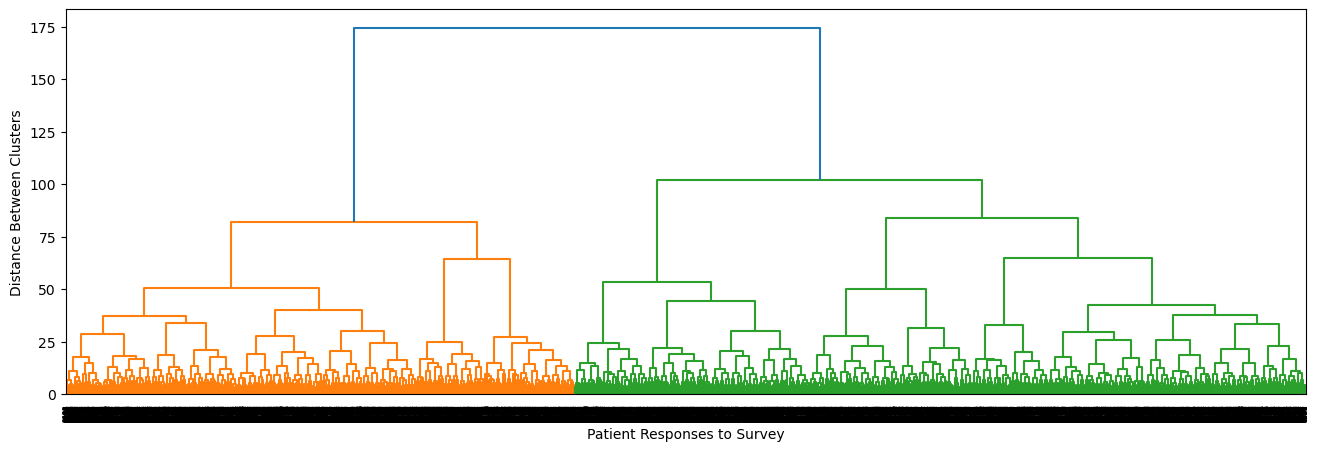

1    4105
2    5895
Name: ward_cluster_labels, dtype: int64


In [6]:
# Use the linkage() function to implement hierarchical clustering. Use the Ward Method. 
# NOTE: method=single was also attempted, and crashed the kernel
# NOTE: method=complete was also attempted but was ineffective (clusters too close together in distance, not very distinct)
distance_matrix_ward = linkage(df[["surv1_timely_admit", "surv2_timely_treat", "surv3_timely_visit", 
                                             "surv4_reliable", "surv5_options", "surv6_hours", 
                                             "surv7_courteous", "surv8_dr_listen"]], method = 'ward', metric = 'euclidean')
# Generate Dendrogram
plt.figure(figsize = [16,5])
dendrogram_ward = dendrogram(distance_matrix_ward)
plt.xlabel("Patient Responses to Survey")
plt.ylabel("Distance Between Clusters");
plt.show()
# Assign cluster labels
df['ward_cluster_labels'] = fcluster(distance_matrix_ward, 2, criterion='maxclust')
print(df['ward_cluster_labels'].value_counts().sort_index())

The y axis indicates the distance between clusters, while the x axis consists of the survey results of each of the 10,000 patients in the dataset. We can see that there are many clusters that are very close to each other in terms of distance, and as the clusters become larger, they begin to become less proximate to each other, as indicated by the longer "stems" of the dendrogram along the y-axis. There is a clear point at which the distance between clusters becomes markedly larger than the prior steps, which occurs between the final two clusters (orange and green), which are nearly as far from each other as are their most distant existing datapoints within each. This is a clear threshold to indicate that these clusters are differently related from each other such that they are worth distinguishing from the other. 

Thus, we can conclude that we want the data to be divided into 2 clusters, which is fed to the `flcuster` function. This function then labels each of the 10,000 observations, adding a label to each row to indicate if that observation is a part of cluster 1 or cluster 2. The printout of `value_counts()` tells us that 58.95% of the datapoints are in cluster 2 (41.05% in cluster 1), which is consistent with what we see in the green cluster in the dendrogram. 

It is worth pointing out that a case can be made for a threshold to be drawn elsewhere, such as drawing a threshold at a distance of ~90, to generate 3 clusters (orange, and the smaller and larger green clusters). This wouldn't necessarily be an incorrect approach. I considered this, but I elected to use the larger threshold at a distance of ~110 because this inflection point was so much more distinct than the one that created 3 clusters. A subsequent analysis of this hierarchical clustering might choose to examine this differently. 

With the discovery of two very distinct clusters within the survey data, we can now explore the differences between these two clusters. This is done through two methods:
1) Visualizing the distribution of survey responses for each question, by cluster (cluster 1 vs cluster 2)
2) Visualizing the overall mean of survey responses for all questions, by cluster (cluster 1 vs cluster 2)


For Question 1 (Importance of Timely Admission), respondents from Cluster 1 scored this at 4.865, on average.
Respondents from Cluster 2 scored this at 5.91, on average.

For Question 2 (Importance of Timely Treatment), respondents from Cluster 1 scored this at 4.895, on average.
Respondents from Cluster 2 scored this at 5.91, on average.


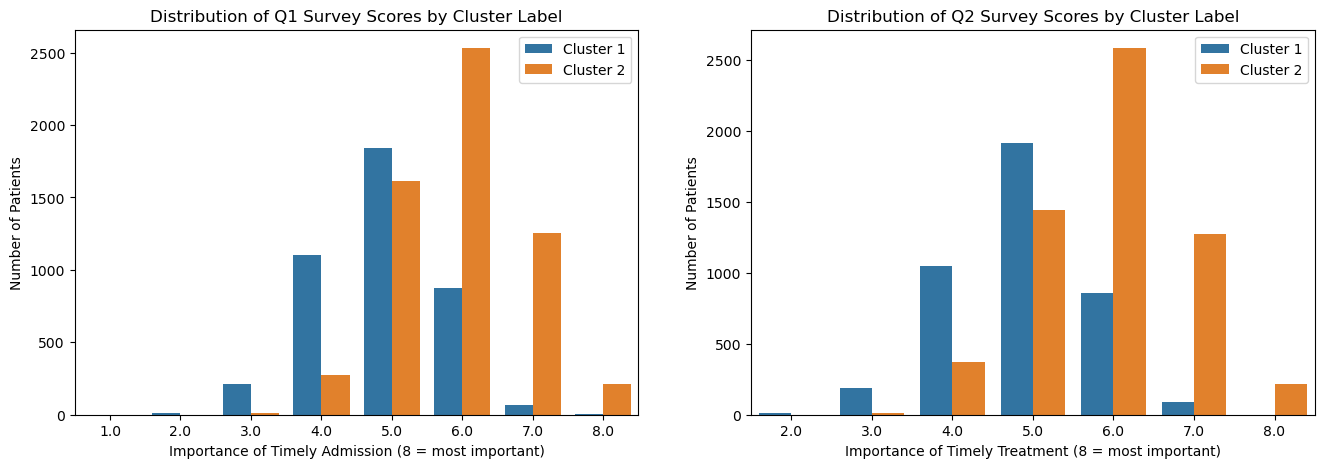

In [7]:
plt.figure(figsize = [16,5])

# LEFT plot: Distribution of scores for survey question 1, by cluster label
plt.subplot(1, 2, 1)
plt.title('Distribution of Q1 Survey Scores by Cluster Label')
sns.countplot(data = df, x="surv1_timely_admit", hue="ward_cluster_labels")
plt.legend(["Cluster 1", "Cluster 2"])
plt.xlabel("Importance of Timely Admission (8 = most important)")
plt.ylabel("Number of Patients");

# RIGHT plot: Distribution of scores for survey question 2, by cluster label
plt.subplot(1, 2, 2)
plt.title("Distribution of Q2 Survey Scores by Cluster Label")
sns.countplot(data = df, x="surv2_timely_treat", hue="ward_cluster_labels")
plt.legend(["Cluster 1", "Cluster 2"])
plt.xlabel("Importance of Timely Treatment (8 = most important)")
plt.ylabel("Number of Patients");

q1_c1_mean = df.loc[df['ward_cluster_labels'] == 1, 'surv1_timely_admit'].mean()
q1_c2_mean = df.loc[df['ward_cluster_labels'] == 2, 'surv1_timely_admit'].mean()
print(f"\nFor Question 1 (Importance of Timely Admission), respondents from Cluster 1 scored this at {round(q1_c1_mean, 3)}, on average.")
print(f"Respondents from Cluster 2 scored this at {round(q1_c2_mean, 3)}, on average.")
q2_c1_mean = df.loc[df['ward_cluster_labels'] == 1, 'surv2_timely_treat'].mean()
q2_c2_mean = df.loc[df['ward_cluster_labels'] == 2, 'surv2_timely_treat'].mean()
print(f"\nFor Question 2 (Importance of Timely Treatment), respondents from Cluster 1 scored this at {round(q2_c1_mean, 3)}, on average.")
print(f"Respondents from Cluster 2 scored this at {round(q2_c2_mean, 3)}, on average.")


For Question 3 (Importance of Timely Visits), respondents from Cluster 1 scored this at 4.89, on average.
Respondents from Cluster 2 scored this at 5.906, on average.

For Question 4 (Importance of Reliability), respondents from Cluster 1 scored this at 5.337, on average.
Respondents from Cluster 2 scored this at 5.588, on average.


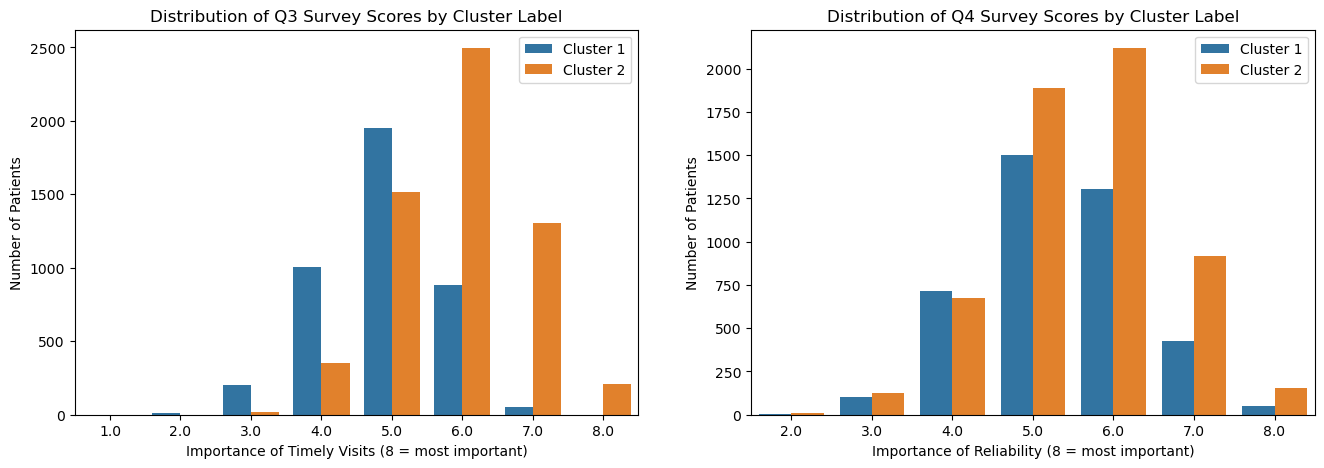

In [8]:
plt.figure(figsize = [16,5])

# LEFT plot: Distribution of scores for survey question 3, by cluster label
plt.subplot(1, 2, 1)
plt.title('Distribution of Q3 Survey Scores by Cluster Label')
sns.countplot(data = df, x="surv3_timely_visit", hue="ward_cluster_labels")
plt.legend(["Cluster 1", "Cluster 2"])
plt.xlabel("Importance of Timely Visits (8 = most important)")
plt.ylabel("Number of Patients");

# RIGHT plot: Distribution of scores for survey question 4, by cluster label
plt.subplot(1, 2, 2)
plt.title("Distribution of Q4 Survey Scores by Cluster Label")
sns.countplot(data = df, x="surv4_reliable", hue="ward_cluster_labels")
plt.legend(["Cluster 1", "Cluster 2"])
plt.xlabel("Importance of Reliability (8 = most important)")
plt.ylabel("Number of Patients");

q3_c1_mean = df.loc[df['ward_cluster_labels'] == 1, 'surv3_timely_visit'].mean()
q3_c2_mean = df.loc[df['ward_cluster_labels'] == 2, 'surv3_timely_visit'].mean()
print(f"\nFor Question 3 (Importance of Timely Visits), respondents from Cluster 1 scored this at {round(q3_c1_mean, 3)}, on average.")
print(f"Respondents from Cluster 2 scored this at {round(q3_c2_mean, 3)}, on average.")
q4_c1_mean = df.loc[df['ward_cluster_labels'] == 1, 'surv4_reliable'].mean()
q4_c2_mean = df.loc[df['ward_cluster_labels'] == 2, 'surv4_reliable'].mean()
print(f"\nFor Question 4 (Importance of Reliability), respondents from Cluster 1 scored this at {round(q4_c1_mean, 3)}, on average.")
print(f"Respondents from Cluster 2 scored this at {round(q4_c2_mean, 3)}, on average.")


For Question 5 (Importance of Options), respondents from Cluster 1 scored this at 5.905, on average.
Respondents from Cluster 2 scored this at 5.224, on average.

For Question 6 (Importance of Hours of Treatment), respondents from Cluster 1 scored this at 4.854, on average.
Respondents from Cluster 2 scored this at 5.912, on average.


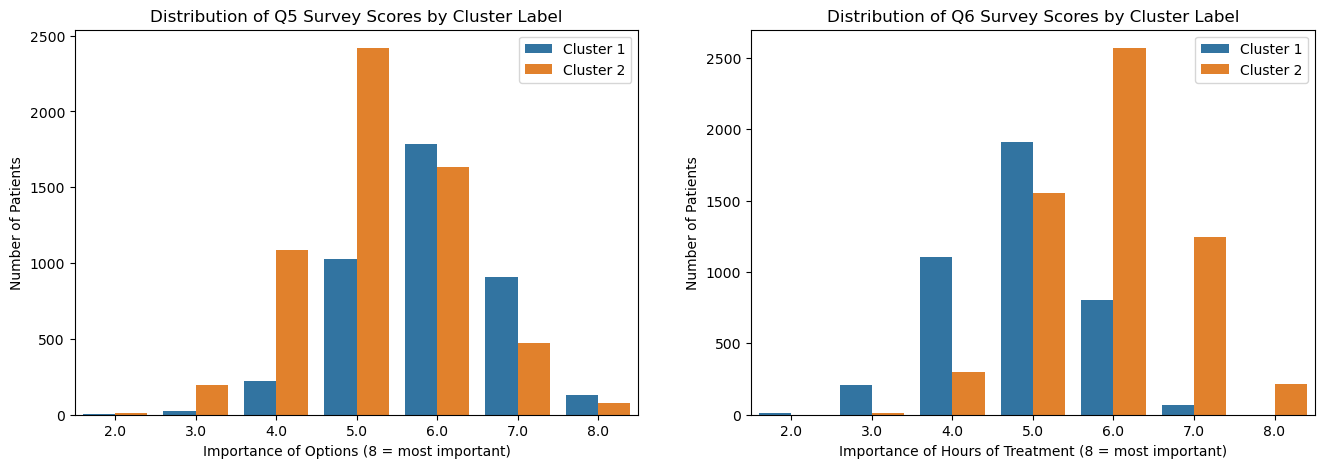

In [9]:
plt.figure(figsize = [16,5])

# LEFT plot: Distribution of scores for survey question 5, by cluster label
plt.subplot(1, 2, 1)
plt.title('Distribution of Q5 Survey Scores by Cluster Label')
sns.countplot(data = df, x="surv5_options", hue="ward_cluster_labels")
plt.legend(["Cluster 1", "Cluster 2"])
plt.xlabel("Importance of Options (8 = most important)")
plt.ylabel("Number of Patients");

# RIGHT plot: Distribution of scores for survey question 6, by cluster label
plt.subplot(1, 2, 2)
plt.title("Distribution of Q6 Survey Scores by Cluster Label")
sns.countplot(data = df, x="surv6_hours", hue="ward_cluster_labels")
plt.legend(["Cluster 1", "Cluster 2"])
plt.xlabel("Importance of Hours of Treatment (8 = most important)")
plt.ylabel("Number of Patients");

q5_c1_mean = df.loc[df['ward_cluster_labels'] == 1, 'surv5_options'].mean()
q5_c2_mean = df.loc[df['ward_cluster_labels'] == 2, 'surv5_options'].mean()
print(f"\nFor Question 5 (Importance of Options), respondents from Cluster 1 scored this at {round(q5_c1_mean, 3)}, on average.")
print(f"Respondents from Cluster 2 scored this at {round(q5_c2_mean, 3)}, on average.")
q6_c1_mean = df.loc[df['ward_cluster_labels'] == 1, 'surv6_hours'].mean()
q6_c2_mean = df.loc[df['ward_cluster_labels'] == 2, 'surv6_hours'].mean()
print(f"\nFor Question 6 (Importance of Hours of Treatment), respondents from Cluster 1 scored this at {round(q6_c1_mean, 3)}, on average.")
print(f"Respondents from Cluster 2 scored this at {round(q6_c2_mean, 3)}, on average.")


For Question 7 (Importance of Courteous Staff), respondents from Cluster 1 scored this at 4.991, on average.
Respondents from Cluster 2 scored this at 5.864, on average.

For Question 8 (Importance of Dr Active Listening), respondents from Cluster 1 scored this at 4.985, on average.
Respondents from Cluster 2 scored this at 5.842, on average.


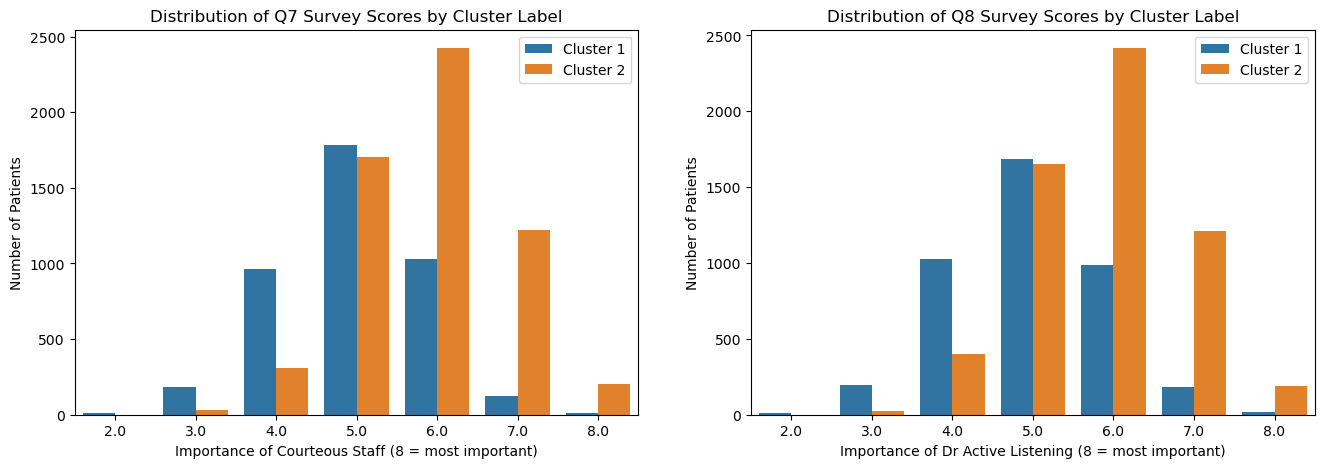

In [10]:
plt.figure(figsize = [16,5])

# LEFT plot: Distribution of scores for survey question 7, by cluster label
plt.subplot(1, 2, 1)
plt.title('Distribution of Q7 Survey Scores by Cluster Label')
sns.countplot(data = df, x="surv7_courteous", hue="ward_cluster_labels")
plt.legend(["Cluster 1", "Cluster 2"])
plt.xlabel("Importance of Courteous Staff (8 = most important)")
plt.ylabel("Number of Patients");

# RIGHT plot: Distribution of scores for survey question 8, by cluster label
plt.subplot(1, 2, 2)
plt.title("Distribution of Q8 Survey Scores by Cluster Label")
sns.countplot(data = df, x="surv8_dr_listen", hue="ward_cluster_labels")
plt.legend(["Cluster 1", "Cluster 2"])
plt.xlabel("Importance of Dr Active Listening (8 = most important)")
plt.ylabel("Number of Patients");

q7_c1_mean = df.loc[df['ward_cluster_labels'] == 1, 'surv7_courteous'].mean()
q7_c2_mean = df.loc[df['ward_cluster_labels'] == 2, 'surv7_courteous'].mean()
print(f"\nFor Question 7 (Importance of Courteous Staff), respondents from Cluster 1 scored this at {round(q7_c1_mean, 3)}, on average.")
print(f"Respondents from Cluster 2 scored this at {round(q7_c2_mean, 3)}, on average.")
q8_c1_mean = df.loc[df['ward_cluster_labels'] == 1, 'surv8_dr_listen'].mean()
q8_c2_mean = df.loc[df['ward_cluster_labels'] == 2, 'surv8_dr_listen'].mean()
print(f"\nFor Question 8 (Importance of Dr Active Listening), respondents from Cluster 1 scored this at {round(q8_c1_mean, 3)}, on average.")
print(f"Respondents from Cluster 2 scored this at {round(q8_c2_mean, 3)}, on average.")

In [11]:
summary_dict = {'cluster_1' : [q1_c1_mean, q2_c1_mean, q3_c1_mean, q4_c1_mean, q5_c1_mean, q6_c1_mean, q7_c1_mean, q8_c1_mean], 'cluster_2' : [q1_c2_mean, q2_c2_mean, q3_c2_mean, q4_c2_mean, q5_c2_mean, q6_c2_mean, q7_c2_mean, q8_c2_mean]}
summary_df = pd.DataFrame(data = summary_dict, index=['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8'])
print("A summary of the means for each question, by participant cluster, can be seen here:")
summary_df

A summary of the means for each question, by participant cluster, can be seen here:


,cluster_1,cluster_2
Q1,4.865043,5.910263
Q2,4.895493,5.909584
Q3,4.890378,5.905683
Q4,5.336906,5.587956
Q5,5.904507,5.223579
Q6,4.853837,5.911790
Q7,4.991474,5.864292
Q8,4.985140,5.842070


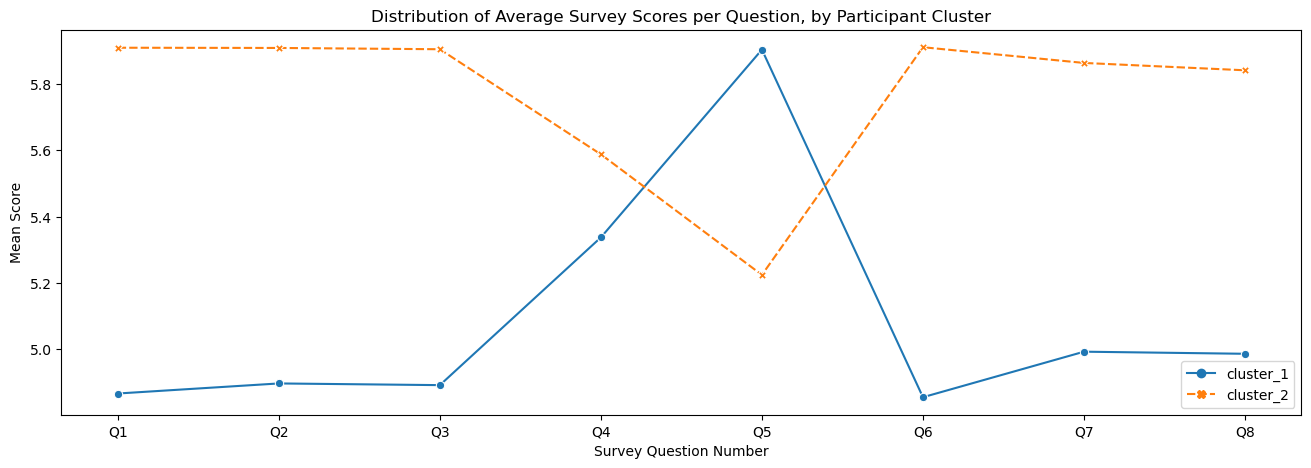

In [12]:
plt.figure(figsize = [16,5])
sns.lineplot(data = summary_df, markers=True)
plt.title("Distribution of Average Survey Scores per Question, by Participant Cluster")
plt.xlabel("Survey Question Number")
plt.ylabel("Mean Score");

<a id="#PartD2"></a>
## D2: Classification Analysis Code

As the rubric requires that I specifically provide all of my code in this section, this code is compiled a second time under this section. 

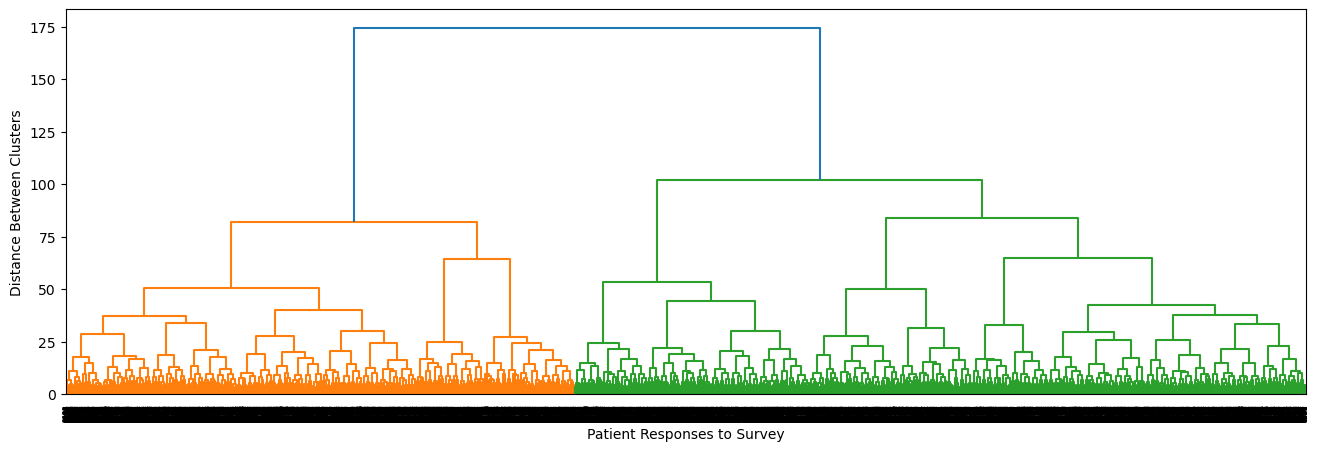

1    4105
2    5895
Name: ward_cluster_labels, dtype: int64


In [13]:
# Use the linkage() function to implement hierarchical clustering. Use the Ward Method. 
# NOTE: method=single was also attempted, and crashed the kernel
# NOTE: method=complete was also attempted but was ineffective (clusters too close together in distance, not very distinct)
distance_matrix_ward = linkage(df[["surv1_timely_admit", "surv2_timely_treat", "surv3_timely_visit", 
                                             "surv4_reliable", "surv5_options", "surv6_hours", 
                                             "surv7_courteous", "surv8_dr_listen"]], method = 'ward', metric = 'euclidean')
# Generate Dendrogram
plt.figure(figsize = [16,5])
dendrogram_ward = dendrogram(distance_matrix_ward)
plt.xlabel("Patient Responses to Survey")
plt.ylabel("Distance Between Clusters");
plt.show()
# Assign cluster labels
df['ward_cluster_labels'] = fcluster(distance_matrix_ward, 2, criterion='maxclust')
print(df['ward_cluster_labels'].value_counts().sort_index())


For Question 1 (Importance of Timely Admission), respondents from Cluster 1 scored this at 4.865, on average.
Respondents from Cluster 2 scored this at 5.91, on average.

For Question 2 (Importance of Timely Treatment), respondents from Cluster 1 scored this at 4.895, on average.
Respondents from Cluster 2 scored this at 5.91, on average.


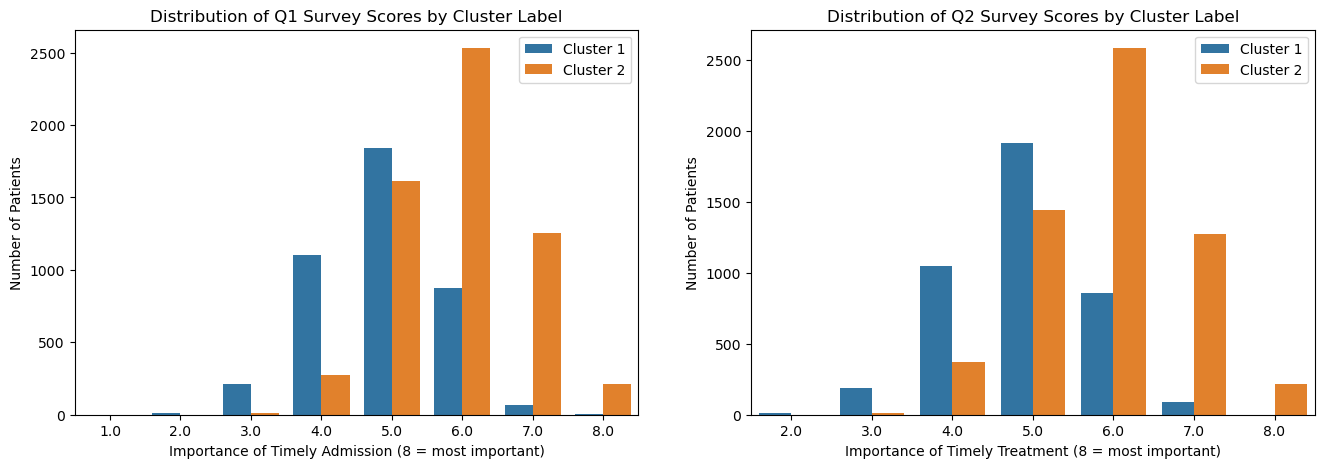

In [14]:
plt.figure(figsize = [16,5])

# LEFT plot: Distribution of scores for survey question 1, by cluster label
plt.subplot(1, 2, 1)
plt.title('Distribution of Q1 Survey Scores by Cluster Label')
sns.countplot(data = df, x="surv1_timely_admit", hue="ward_cluster_labels")
plt.legend(["Cluster 1", "Cluster 2"])
plt.xlabel("Importance of Timely Admission (8 = most important)")
plt.ylabel("Number of Patients");

# RIGHT plot: Distribution of scores for survey question 2, by cluster label
plt.subplot(1, 2, 2)
plt.title("Distribution of Q2 Survey Scores by Cluster Label")
sns.countplot(data = df, x="surv2_timely_treat", hue="ward_cluster_labels")
plt.legend(["Cluster 1", "Cluster 2"])
plt.xlabel("Importance of Timely Treatment (8 = most important)")
plt.ylabel("Number of Patients");

q1_c1_mean = df.loc[df['ward_cluster_labels'] == 1, 'surv1_timely_admit'].mean()
q1_c2_mean = df.loc[df['ward_cluster_labels'] == 2, 'surv1_timely_admit'].mean()
print(f"\nFor Question 1 (Importance of Timely Admission), respondents from Cluster 1 scored this at {round(q1_c1_mean, 3)}, on average.")
print(f"Respondents from Cluster 2 scored this at {round(q1_c2_mean, 3)}, on average.")
q2_c1_mean = df.loc[df['ward_cluster_labels'] == 1, 'surv2_timely_treat'].mean()
q2_c2_mean = df.loc[df['ward_cluster_labels'] == 2, 'surv2_timely_treat'].mean()
print(f"\nFor Question 2 (Importance of Timely Treatment), respondents from Cluster 1 scored this at {round(q2_c1_mean, 3)}, on average.")
print(f"Respondents from Cluster 2 scored this at {round(q2_c2_mean, 3)}, on average.")


For Question 3 (Importance of Timely Visits), respondents from Cluster 1 scored this at 4.89, on average.
Respondents from Cluster 2 scored this at 5.906, on average.

For Question 4 (Importance of Reliability), respondents from Cluster 1 scored this at 5.337, on average.
Respondents from Cluster 2 scored this at 5.588, on average.


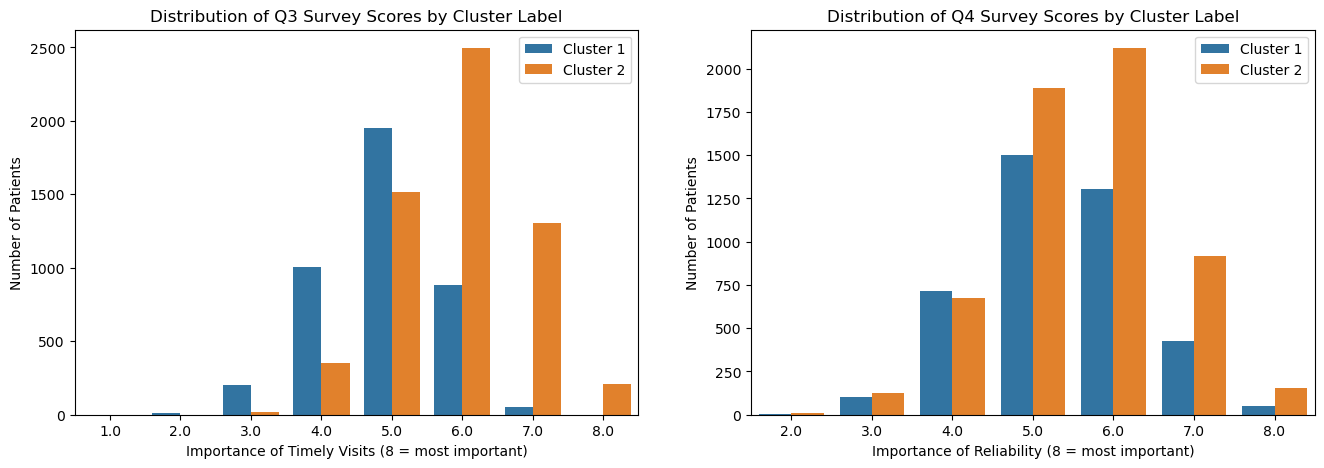

In [15]:
plt.figure(figsize = [16,5])

# LEFT plot: Distribution of scores for survey question 3, by cluster label
plt.subplot(1, 2, 1)
plt.title('Distribution of Q3 Survey Scores by Cluster Label')
sns.countplot(data = df, x="surv3_timely_visit", hue="ward_cluster_labels")
plt.legend(["Cluster 1", "Cluster 2"])
plt.xlabel("Importance of Timely Visits (8 = most important)")
plt.ylabel("Number of Patients");

# RIGHT plot: Distribution of scores for survey question 4, by cluster label
plt.subplot(1, 2, 2)
plt.title("Distribution of Q4 Survey Scores by Cluster Label")
sns.countplot(data = df, x="surv4_reliable", hue="ward_cluster_labels")
plt.legend(["Cluster 1", "Cluster 2"])
plt.xlabel("Importance of Reliability (8 = most important)")
plt.ylabel("Number of Patients");

q3_c1_mean = df.loc[df['ward_cluster_labels'] == 1, 'surv3_timely_visit'].mean()
q3_c2_mean = df.loc[df['ward_cluster_labels'] == 2, 'surv3_timely_visit'].mean()
print(f"\nFor Question 3 (Importance of Timely Visits), respondents from Cluster 1 scored this at {round(q3_c1_mean, 3)}, on average.")
print(f"Respondents from Cluster 2 scored this at {round(q3_c2_mean, 3)}, on average.")
q4_c1_mean = df.loc[df['ward_cluster_labels'] == 1, 'surv4_reliable'].mean()
q4_c2_mean = df.loc[df['ward_cluster_labels'] == 2, 'surv4_reliable'].mean()
print(f"\nFor Question 4 (Importance of Reliability), respondents from Cluster 1 scored this at {round(q4_c1_mean, 3)}, on average.")
print(f"Respondents from Cluster 2 scored this at {round(q4_c2_mean, 3)}, on average.")


For Question 5 (Importance of Options), respondents from Cluster 1 scored this at 5.905, on average.
Respondents from Cluster 2 scored this at 5.224, on average.

For Question 6 (Importance of Hours of Treatment), respondents from Cluster 1 scored this at 4.854, on average.
Respondents from Cluster 2 scored this at 5.912, on average.


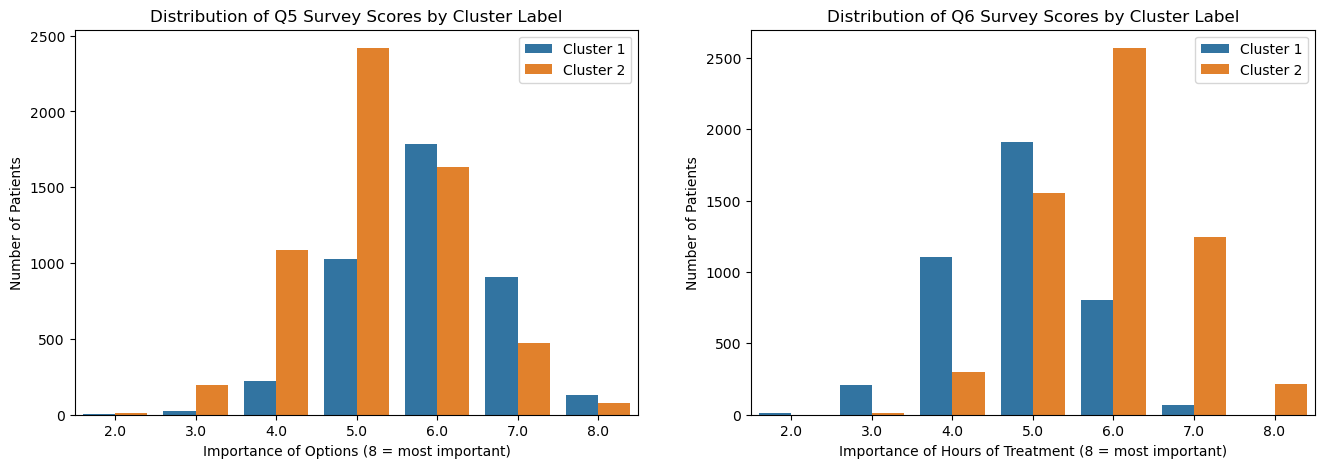

In [16]:
plt.figure(figsize = [16,5])

# LEFT plot: Distribution of scores for survey question 5, by cluster label
plt.subplot(1, 2, 1)
plt.title('Distribution of Q5 Survey Scores by Cluster Label')
sns.countplot(data = df, x="surv5_options", hue="ward_cluster_labels")
plt.legend(["Cluster 1", "Cluster 2"])
plt.xlabel("Importance of Options (8 = most important)")
plt.ylabel("Number of Patients");

# RIGHT plot: Distribution of scores for survey question 6, by cluster label
plt.subplot(1, 2, 2)
plt.title("Distribution of Q6 Survey Scores by Cluster Label")
sns.countplot(data = df, x="surv6_hours", hue="ward_cluster_labels")
plt.legend(["Cluster 1", "Cluster 2"])
plt.xlabel("Importance of Hours of Treatment (8 = most important)")
plt.ylabel("Number of Patients");

q5_c1_mean = df.loc[df['ward_cluster_labels'] == 1, 'surv5_options'].mean()
q5_c2_mean = df.loc[df['ward_cluster_labels'] == 2, 'surv5_options'].mean()
print(f"\nFor Question 5 (Importance of Options), respondents from Cluster 1 scored this at {round(q5_c1_mean, 3)}, on average.")
print(f"Respondents from Cluster 2 scored this at {round(q5_c2_mean, 3)}, on average.")
q6_c1_mean = df.loc[df['ward_cluster_labels'] == 1, 'surv6_hours'].mean()
q6_c2_mean = df.loc[df['ward_cluster_labels'] == 2, 'surv6_hours'].mean()
print(f"\nFor Question 6 (Importance of Hours of Treatment), respondents from Cluster 1 scored this at {round(q6_c1_mean, 3)}, on average.")
print(f"Respondents from Cluster 2 scored this at {round(q6_c2_mean, 3)}, on average.")


For Question 7 (Importance of Courteous Staff), respondents from Cluster 1 scored this at 4.991, on average.
Respondents from Cluster 2 scored this at 5.864, on average.

For Question 8 (Importance of Dr Active Listening), respondents from Cluster 1 scored this at 4.985, on average.
Respondents from Cluster 2 scored this at 5.842, on average.


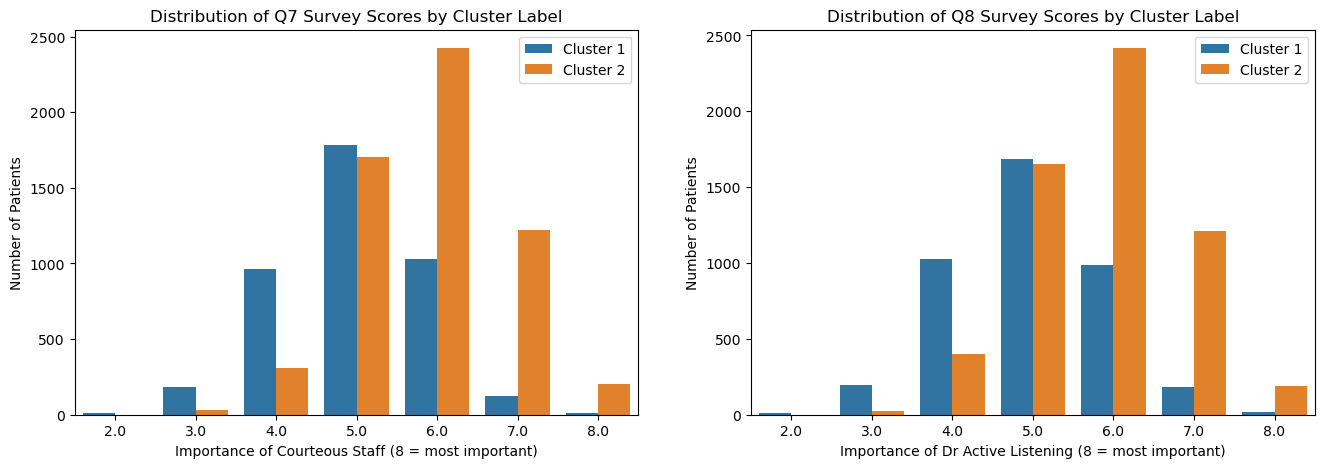

In [17]:
plt.figure(figsize = [16,5])

# LEFT plot: Distribution of scores for survey question 7, by cluster label
plt.subplot(1, 2, 1)
plt.title('Distribution of Q7 Survey Scores by Cluster Label')
sns.countplot(data = df, x="surv7_courteous", hue="ward_cluster_labels")
plt.legend(["Cluster 1", "Cluster 2"])
plt.xlabel("Importance of Courteous Staff (8 = most important)")
plt.ylabel("Number of Patients");

# RIGHT plot: Distribution of scores for survey question 8, by cluster label
plt.subplot(1, 2, 2)
plt.title("Distribution of Q8 Survey Scores by Cluster Label")
sns.countplot(data = df, x="surv8_dr_listen", hue="ward_cluster_labels")
plt.legend(["Cluster 1", "Cluster 2"])
plt.xlabel("Importance of Dr Active Listening (8 = most important)")
plt.ylabel("Number of Patients");

q7_c1_mean = df.loc[df['ward_cluster_labels'] == 1, 'surv7_courteous'].mean()
q7_c2_mean = df.loc[df['ward_cluster_labels'] == 2, 'surv7_courteous'].mean()
print(f"\nFor Question 7 (Importance of Courteous Staff), respondents from Cluster 1 scored this at {round(q7_c1_mean, 3)}, on average.")
print(f"Respondents from Cluster 2 scored this at {round(q7_c2_mean, 3)}, on average.")
q8_c1_mean = df.loc[df['ward_cluster_labels'] == 1, 'surv8_dr_listen'].mean()
q8_c2_mean = df.loc[df['ward_cluster_labels'] == 2, 'surv8_dr_listen'].mean()
print(f"\nFor Question 8 (Importance of Dr Active Listening), respondents from Cluster 1 scored this at {round(q8_c1_mean, 3)}, on average.")
print(f"Respondents from Cluster 2 scored this at {round(q8_c2_mean, 3)}, on average.")

In [18]:
summary_dict = {'cluster_1' : [q1_c1_mean, q2_c1_mean, q3_c1_mean, q4_c1_mean, q5_c1_mean, q6_c1_mean, q7_c1_mean, q8_c1_mean], 'cluster_2' : [q1_c2_mean, q2_c2_mean, q3_c2_mean, q4_c2_mean, q5_c2_mean, q6_c2_mean, q7_c2_mean, q8_c2_mean]}
summary_df = pd.DataFrame(data = summary_dict, index=['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8'])
print("A summary of the means for each question, by participant cluster, can be seen here:")
summary_df

A summary of the means for each question, by participant cluster, can be seen here:


,cluster_1,cluster_2
Q1,4.865043,5.910263
Q2,4.895493,5.909584
Q3,4.890378,5.905683
Q4,5.336906,5.587956
Q5,5.904507,5.223579
Q6,4.853837,5.911790
Q7,4.991474,5.864292
Q8,4.985140,5.842070


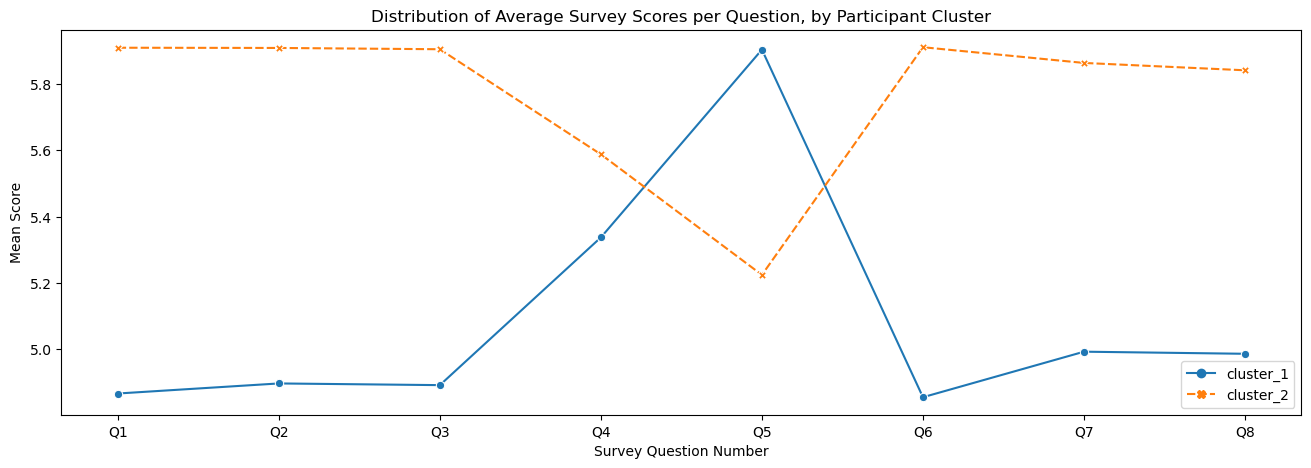

In [19]:
plt.figure(figsize = [16,5])
sns.lineplot(data = summary_df, markers=True)
plt.title("Distribution of Average Survey Scores per Question, by Participant Cluster")
plt.xlabel("Survey Question Number")
plt.ylabel("Mean Score");

<a id="#PartE1"></a>
## E1: Accuracy of Clustering Model

It is not possible to calculate a traditional "accuracy" for this clustering of survey responses, because there is no "true" labels to compare the generated clusters against, like we were able to do in prior projects dealing with classification [(Saylor Academy, CS250 Python for Data Science, Applying Clustering)](https://learn.saylor.org/mod/book/view.php?id=55626&chapterid=41483#:~:text=clustering%20results%20are.-,Silhouette,-In%20contrast%20to). Instead, we can use the SciKit Learn's silhouette score to calculate the Silhouette Coefficient to evaluate the effectiveness of this clustering model. [Using this answer from StackOverflow as an example](https://stackoverflow.com/questions/27875056/how-to-calculate-silhouette-score-of-the-scipys-fcluster-using-scikit-learn-sil), we can easily determine the Silhouette Coefficient for this clustering model. 

In [20]:
# Define and X (feature columns) and y (resulting cluster labels)
X = df[["surv1_timely_admit", "surv2_timely_treat", "surv3_timely_visit", 
                                             "surv4_reliable", "surv5_options", "surv6_hours", 
                                             "surv7_courteous", "surv8_dr_listen"]]
y = df['ward_cluster_labels']
# Generate a silhouette score and print it out
model_score = silhouette_score(X, y, metric='euclidean')
print(f"The silhouette score of this hierarchical clustering is: {round(model_score, 3)}")

The silhouette score of this hierarchical clustering is: 0.148


The Silhouette Coefficient is a number between -1 and 1. A score of -1 indicates very bad clustering, while a score of 1 indicates very well defined and dense clusters. Values near 0 indicate overlapping clusters. 

In this case, the silhouette score of 0.148 indicates that the clustering model is at least "not bad". It's not an outright bad clustering, though its proximity to 0 indicates that there is some overlap between the clusters. That is not surprising, both because the overall data from which these clusters are generated is so homogenous and because the distinction between these two clusters is visible but not especially starkly pronounced. This basically represents an outcome of "there's a difference here, but its not a tremendous one", which is exactly what could be concluded from the line graph comparing the means of each cluster per survey question. This is also consistent with my experience in the rough draft of this report, where I generated clusters of this data using 'single' and 'complete' linkage methods and even kmeans clustering, as each of these cluster models, when graphed, were clearly much less effectively clustered than the 'ward' method that was used in the final draft of this analysis.
 
<a id="#PartE2"></a>
## E2: Model Results

In [21]:
print("A summary of the means for each question, by participant cluster, can be seen here:")
summary_df

A summary of the means for each question, by participant cluster, can be seen here:


,cluster_1,cluster_2
Q1,4.865043,5.910263
Q2,4.895493,5.909584
Q3,4.890378,5.905683
Q4,5.336906,5.587956
Q5,5.904507,5.223579
Q6,4.853837,5.911790
Q7,4.991474,5.864292
Q8,4.985140,5.842070


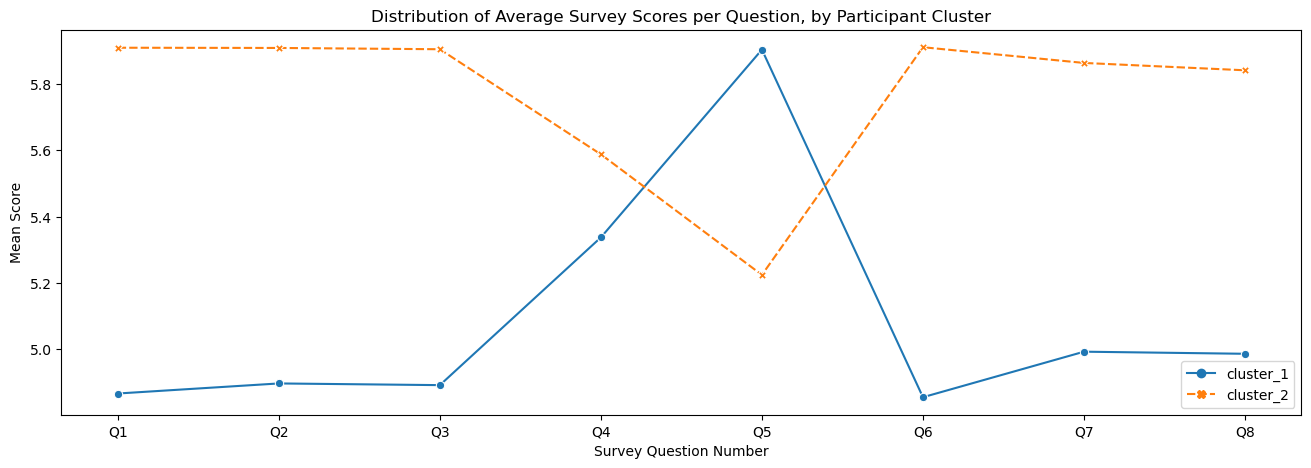

In [22]:
plt.figure(figsize = [16,5])
sns.lineplot(data = summary_df, markers=True)
plt.title("Distribution of Average Survey Scores per Question, by Participant Cluster")
plt.xlabel("Survey Question Number")
plt.ylabel("Mean Score");

This hierarchical clustering model splits the survey responses into two clusters. We can see that Cluster 2 (~59% of patients) scores Questions 1, 2, 3, 6, 7, 8 nearly identically, at around 5.85 - 5.90 on the survey score range of 1 - 8. This cluster's survey scores drop off from this average for only Questions 4 (mean of ~5.59) and 5 (mean of ~5.22). Question 4 addresses the importance of "reliability", while Question 5 addresses the importance of "options". Neither of these concepts are explained in any sort of detail, nor given any context. 

Cluster 1 (~41% of patients) scores Questions 1, 2, 3, 6, 7, and 8 very closely, with 1, 2, 3, and 6 being around 4.85 - 4.90, though 7 & 8 do see a slight increase to ~5.00. Overall, though, the responses to these survey questions are very similar and the minor increase for questions 7 and 8 may not be significant. In comparison to Cluster 2, we can see that Cluster 1 consistently rates all of these survey questions as being consistently less important than Cluster 2 feels about the same questions, with Cluster 1's mean scores being almost 1 less than Cluster 2's for each question. Cluster 1 is notably different from Cluster 2 in that where Cluster 2's scores for Questions 4 & 5 decrease by about 5-10% relative to the "baseline" established by all of the other questions, Cluster 1's responses to Questions 4 & 5 actually *increase* by about 10-20% for these questions, with a mean of ~5.34 on Q4 and 5.9 on Q5.

With this information, we can conclude a couple of things. First of all, we can see that all patients, taken as a whole, feel relatively similarly about the importance of Questions 1, 2, 3, 6, 7, 8, *relative to each other*. While Cluster 1 gives those questions lower scores than Cluster 2, they are both consistent in that the scores for each of those 6 questions turn out relatively equally within that cluster. The second large conclusion that we can draw from this is that patients in Cluster 1 (again, ~ 41% of patients in the dataset) feel very strongly that "reliability" and "options" are more important than the other 6 features of the survey, while the patients in Cluster 2 (~ 59% of patients) feel that "reliability" and "options" are less important than every other feature of the survey.

This is an important distinction. Ignoring the vagueness of "reliability" or "options" (which is a significant problem that we'll address momentarily), what this means is that the majority of patients find these to be the least important considerations in their hospitalization. This could imply that the WGU Hospital System as a whole could concern itself less with these particular issues... but this would likely alienate and dissatisfy the 40% of patients for whom this is by far the most important consideration in their hospitalization. While Cluster 2 may be the majority, Cluster 1 is still large enough to merit significant consideration, especially given that Cluster 1 clearly feels strongly that these two considerations are the most important in their experience with the WGU Hospital System, while Cluster 2 fails to put forth a clear "most important" consideration. 

<a id="#PartE3"></a>
## E3: Model Limitations

One significant limitation of this analysis is the subjective nature of determining the number of clusters to divide survey respondents into. I explained in detail in section D1 why I chose to cluster the data into 2 clusters rather than the also-justifiable 3 clusters (or even 5, if a more granular examination was desired). The fact that 2 clusters demonstrated a distinct difference in survey responses between Cluster 1 and Cluster 2 supports that this was a reasonable approach, because the larger distance between the 2 clusters (compared to 3 or 5) helps highlight the significant difference between the two. Another analysis, using smaller clusters, would likely find more differences between those clusters than I have, though they would likely be smaller as well, because those clusters were not as far apart from each other, possibly making it more difficult to draw clear distinctions between clusters. However, this does not mean that these analyses might not be without value as well, potentially even more so than this analysis was - especially with a larger population than the existing 10,000 observations.  

<a id="#PartE4"></a>
## E4: Recommended Action

There are two primary recommendations that the WGU Hospital System should consider, based on this analysis. 

In [23]:
X.head(1)

,surv1_timely_admit,surv2_timely_treat,surv3_timely_visit,surv4_reliable,surv5_options,surv6_hours,surv7_courteous,surv8_dr_listen
CaseOrder,,,,,,,,
1,6.0,6.0,7.0,7.0,5.0,6.0,6.0,5.0


First of all, the range of potential survey responses seems to be too large. The range of 1 - 8 seems to have resulted in almost all of the questions being tethered to the "mushy middle". Ultimately, if everything is equally important, then nothing is important. A smaller range of survey responses should provide a more meaningful rating of the importance of various considerations to each patient. It is difficult to tell how important a "4" is relative to a "5" or a "3". A smaller scale, such as 1 (least important) to 5 (most important) would be more informative. This would also be consistent with how most patients are using the survey currently, where the vast majority of answers are focused around the center values of the survey. Alternatively, patients could be asked to rank each of these 8 considerations in order by importance, which would force a distinction between whether one consideration or another is more important, which is currently not present in the data. While the data dictionary doesn't necessarily rule out that this could be the current process, a quick look at the data (seen above) shows that this is not the case, as such a ranking would force unique rankings of 1 - 8 for all 8 survey vectors, but we see that this is not the case in just the first patient's survey responses. 

The second recommendation that I would make based on this analysis is to revise the wording of this survey. Presently, patients have disparate attitudes regarding the importance of both "reliability" and "options". The vagueness of these concepts undermines the ability for me to make a meaningful recommendation regarding how to proceed with either of these, and if it is overly vague to me as a data analyst, it is probably even more so for a patient filling out the survey. Without any clarity regarding if "options" is referring to options for treatment, or options for payment & insurance, or even options regarding hospital locations. "Reliability" is similarly problematic, without fewer clear options for what it *could* mean. A survey that is vague and unclear is a less effective survey both because it means different things to different respondents and because it limits the ability to draw effective conclusions to address that feedback. 

<a id="#PartF"></a>
## F: Panopto Recording

My presentation of this performance assessment [can be viewed here, via Panopto.](https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=7aac6baa-525c-447f-b945-af8d00256ee6)

<a id="#PartG"></a>
## G: Code References

[William Townsend D209 Task 1 Performance Assessment Submission](https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=f273f038-af83-4566-8331-af60017c5ba8) and [William Townsend D209 Task 2 Performance Assessment Submission](https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=45c9fcbc-e6e6-448d-9086-af6600016eba) were used for a number of pieces of code, particularly cleaning up the dataset as well as some of the preparation for the actual analysis, given that these were very similar projects to this one. 

[StackOverflow: How to Calculate Silhouette Score of the SciPy fcluster Using SKLearn's Silhouette Score](https://stackoverflow.com/questions/27875056/how-to-calculate-silhouette-score-of-the-scipys-fcluster-using-scikit-learn-sil) was used as an example for helping me code the silhouette score of the clustering model. 

<a id="#PartH"></a>
## H: Source References

[SciPy Linkage function documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) was used for determining the methodologies for generating hierarchical classification and testing different ones before settling on using the ward variance minimization method. 

[(Saylor Academy, CS250 Python for Data Science, Applying Clustering)](https://learn.saylor.org/mod/book/view.php?id=55626&chapterid=41483#:~:text=clustering%20results%20are.-,Silhouette,-In%20contrast%20to) helped me figure out how to go about providing some sort of measure of the clustering model's effectiveness, in the absence of being able to actually determine its accuracy. 